In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

df = pd.read_csv('kc_house_data.csv')

In [2]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df = df.drop('id', axis=1)

In [4]:
df.view = df.view.astype('str')

In [5]:
df = df[df.view != 'nan']

In [6]:
df.view = df.view.astype('float')

In [7]:
df = df[df.sqft_basement != '?']

In [8]:
df.yr_renovated = df.yr_renovated.fillna(0)

In [12]:
df.waterfront = df.waterfront.replace(np.nan, 0)

In [20]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [17]:
df.waterfront = df.waterfront.astype('int')

In [18]:
df.sqft_basement = df.sqft_basement.astype('float')

In [19]:
df.yr_renovated = df.yr_renovated.astype('int')

In [31]:
df.yr_renovated.unique()

array([   0, 1991, 2002, 2010, 1992, 2013, 1994, 1978, 2005, 2003, 1984,
       1954, 2014, 2011, 1983, 1945, 1990, 1988, 1977, 1981, 1995, 2000,
       1999, 1998, 1970, 1989, 2004, 1986, 2007, 1987, 2006, 1985, 1980,
       1971, 1979, 1997, 1950, 1969, 1948, 2009, 2015, 1974, 2008, 1968,
       2012, 1963, 1951, 1962, 2001, 1953, 1993, 1996, 1955, 1982, 1956,
       1940, 1976, 1975, 1964, 1973, 1957, 1959, 1960, 1967, 1965, 1934,
       1972, 1944, 1958])

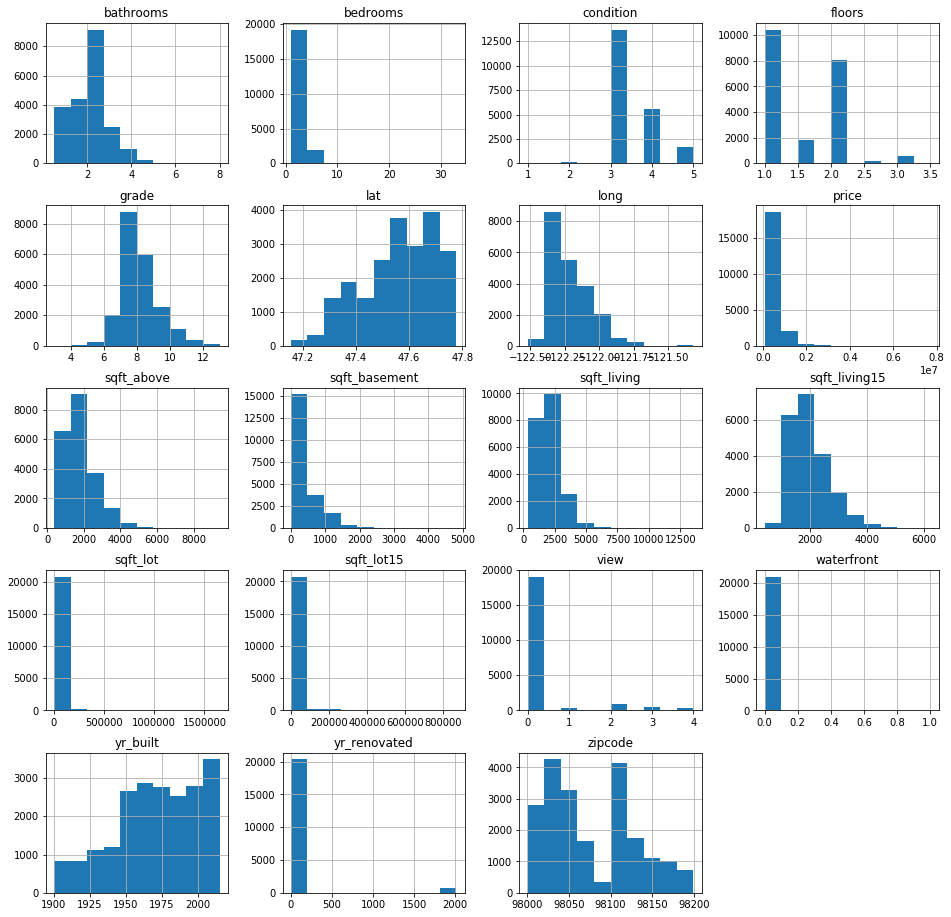

In [21]:
df.hist(figsize= [16,16]);

In [22]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.108200e+04,21082.000000,21082.000000,21082.000000,2.108200e+04,21082.00000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,5.402469e+05,3.372403,2.115916,2080.359975,1.507759e+04,1.49362,0.006688,0.233327,3.409828,7.657717,1789.000000,291.359975,1971.023337,68.359359,98077.858837,47.560371,-122.213843,1986.917418,12732.514135
std,3.667323e+05,0.924996,0.768142,917.856396,4.117338e+04,0.53937,0.081509,0.765066,0.650597,1.173690,828.369355,442.007858,29.323120,363.029573,53.528769,0.138568,0.140607,685.544250,27148.781580
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.00000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471325,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.230000,1840.000000,7626.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069775e+04,2.00000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10088.750000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.50000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [29]:
(df.yr_built >= 2000).value_counts()

False    16452
True      4630
Name: yr_built, dtype: int64

In [35]:
df_new_houses = df[df.yr_built >= 2000]
df_new_houses.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,4.630000e+03,4630.000000,4630.000000,4630.000000,4.630000e+03,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000
mean,6.191115e+05,3.496112,2.679590,2473.316199,1.216871e+04,2.055076,0.003456,0.164363,3.007127,8.337365,2304.733693,168.582505,2006.835853,0.433909,98070.521166,47.556815,-122.169460,2233.591361,10300.390929
std,4.239580e+05,0.866484,0.634152,1046.320376,4.611941e+04,0.418815,0.058690,0.647364,0.089119,1.087154,951.420259,365.702376,4.249083,29.524968,44.723189,0.131086,0.155719,794.545714,33116.707996
min,1.607970e+05,1.000000,0.750000,550.000000,5.720000e+02,1.000000,0.000000,0.000000,3.000000,5.000000,550.000000,0.000000,2000.000000,0.000000,98001.000000,47.189500,-122.486000,690.000000,651.000000
25%,3.750000e+05,3.000000,2.500000,1640.000000,2.500000e+03,2.000000,0.000000,0.000000,3.000000,8.000000,1550.000000,0.000000,2004.000000,0.000000,98038.000000,47.484225,-122.309000,1580.000000,3043.250000
50%,5.030225e+05,3.500000,2.500000,2350.000000,5.000000e+03,2.000000,0.000000,0.000000,3.000000,8.000000,2240.000000,0.000000,2006.000000,0.000000,98059.000000,47.559550,-122.179000,2130.000000,5100.000000
75%,7.200000e+05,4.000000,3.000000,3080.000000,7.245000e+03,2.000000,0.000000,0.000000,3.000000,9.000000,2910.000000,148.750000,2010.000000,0.000000,98107.000000,47.671800,-122.034000,2730.000000,7253.750000
max,6.890000e+06,10.000000,7.750000,9890.000000,1.024068e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,3000.000000,2015.000000,2009.000000,98199.000000,47.776700,-121.402000,6210.000000,871200.000000


In [32]:
df[(df.yr_built >= 2000) & (df.yr_renovated > 0)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
18171,10/22/2014,825000.0,4,3.5,3620,6499,2.5,0,0.0,3,9,3620,0.0,2003,2009,98177,47.7326,-122.36,2330,7200


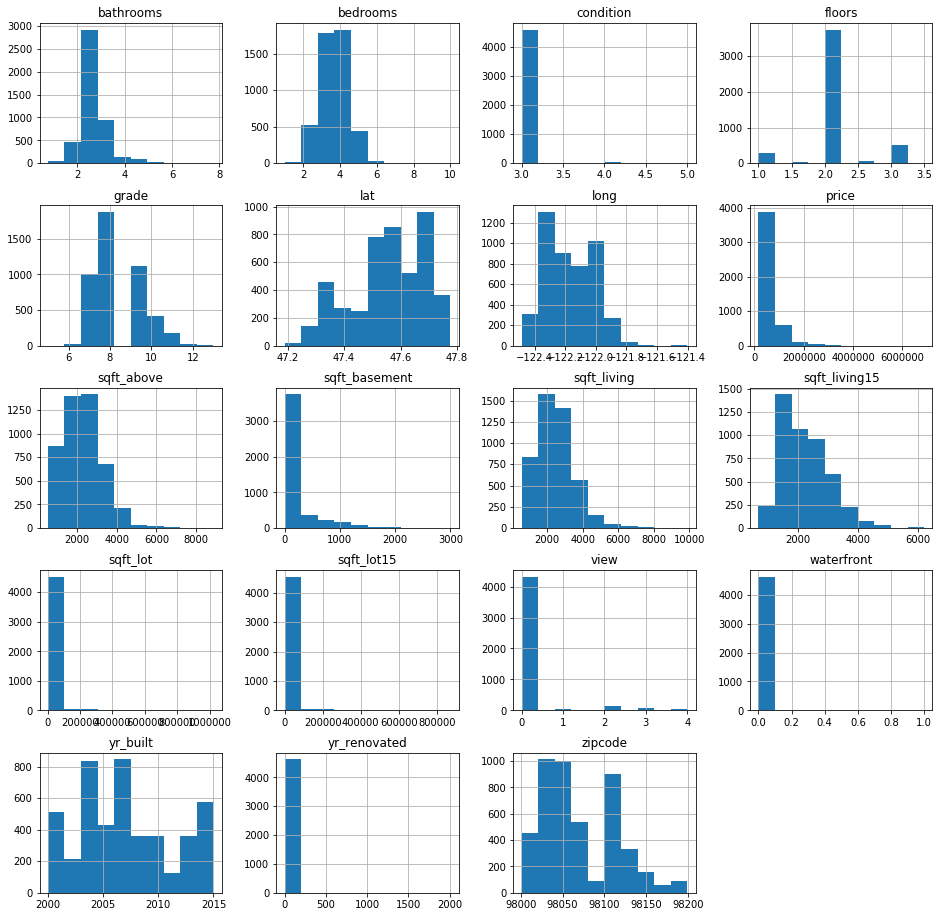

In [40]:
df_new_houses.hist(figsize=[16,16]);

New Houses Analysis

4630 homes built since 2000
Mean Values
Bedrooms: 3.5
Bathrooms: 2.7
Floors: 2.1
Squarefoot Living: 2473.3
Condition: 3
Grade: 8.3

Of those houses, only 1 has been renovated since it was built 
Address: 204 NW 143rd St, Seattle, WA 98177
Condition: 3
Grade: 9
Year Built: 2003
Year Renovated: 2009

Most homes constructed in 2014

Text(0, 0.5, 'Number of Houses Constructed')

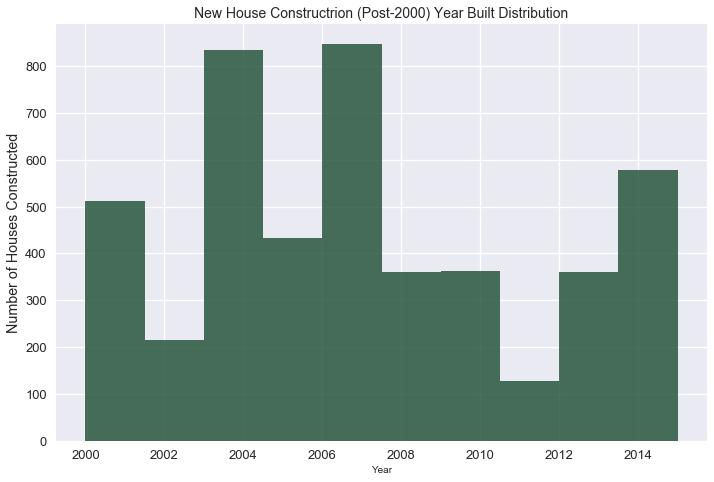

In [92]:
df_year_built = pd.DataFrame(df_new_houses.yr_built)
plt.style.use('seaborn-talk')
df_year_built.hist(color=(0.1, 0.3, 0.2, 0.8))
plt.title('New House Constructrion (Post-2000) Year Built Distribution', size=14)
plt.xlabel('Year', size=10)
plt.ylabel('Number of Houses Constructed')

Text(0, 0.5, 'Number of Houses Constructed')

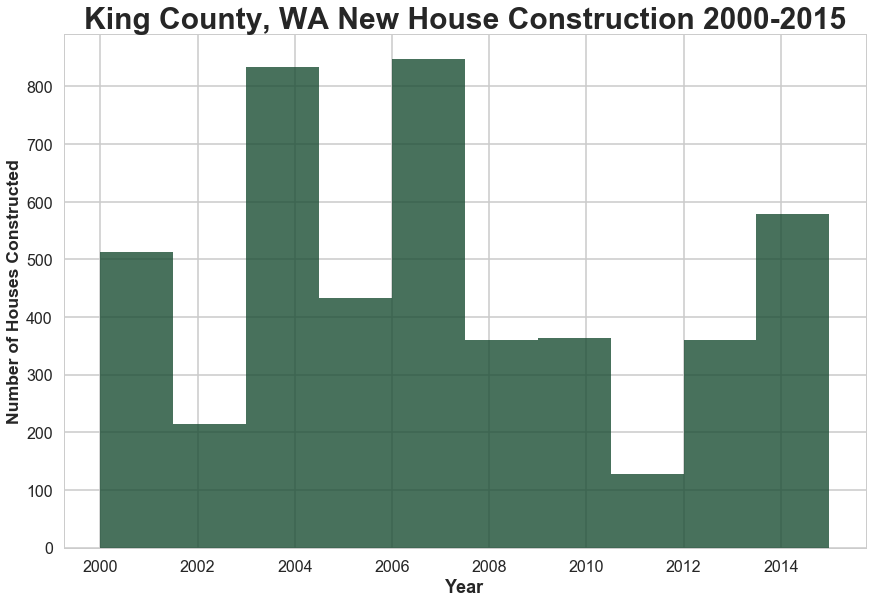

In [196]:
df_year_built = pd.DataFrame(df_new_houses.yr_built)
plt.style.use('seaborn-poster')
df_year_built.yr_built.hist(color=(0.1, 0.3, 0.2, 0.8))
plt.title('King County, WA New House Construction 2000-2015', fontweight='bold', size=30)
plt.xlabel('Year', size=18, fontweight='bold')
plt.ylabel('Number of Houses Constructed', fontweight='bold')

In [116]:
df_new_houses.yr_built.value_counts()

2014    541
2006    443
2005    433
2004    419
2003    415
2007    405
2008    360
2001    302
2009    223
2002    214
2000    210
2013    196
2012    165
2010    140
2011    127
2015     37
Name: yr_built, dtype: int64

In [212]:
df_year_built_count = pd.DataFrame(pd.Series(df_new_houses.yr_built.value_counts()))

In [213]:
df_year_built_count.head()

,yr_built
2014,541
2006,443
2005,433
2004,419
2003,415


In [231]:
df_year_built_count_2 = pd.DataFrame(pd.Series(df_new_houses.yr_built.value_counts()))

In [232]:
df_year_built_count_2.head()

,yr_built
2014,541
2006,443
2005,433
2004,419
2003,415


In [233]:
df_year_built_count_2 = df_year_built_count_2.reset_index()

In [229]:
df_year_built_count_2 = df_year_built_count_2.set_index('yr_built')

In [234]:
df_year_built_count_2.head()

,index,yr_built
0,2014,541
1,2006,443
2,2005,433
3,2004,419
4,2003,415


In [ ]:
df_year_built_count_2.rename()

In [216]:
df_year_built_count = df_year_built_count.reset_index()

In [219]:
df_year_built_count = df_year_built_count.rename(columns={'index':'year_built'})

In [221]:
df_year_built_count = df_year_built_count.rename(columns={'yr_built':'count'})

In [241]:
df_year_built_count.columns

Index(['year_built', 'count'], dtype='object')

In [236]:
df_year_built_count.plot(x=df_year_built_count.year_built, y=df_year_built_count.count)

KeyError: '[2014 2006 2005 2004 2003 2007 2008 2001 2009 2002 2000 2013 2012 2010\n 2011 2015] not in index'

In [150]:
x = pd.Series(range(0, len(df_year_built)))
df_year_built_2 = df_year_built.set_index(x)

In [151]:
df_year_built_2.head()

,yr_built
0,2001
1,2003
2,2005
3,2003
4,2005


In [146]:
df_year_built.yr_built.value_counts().sum()

4630

In [183]:
df_top_five_zip_codes = pd.DataFrame(df_new_houses.zipcode.value_counts()[:5])
df_top_five_zip_codes.head()

,zipcode
98038,291
98053,238
98065,229
98059,205
98103,181


In [186]:
df_top_five_zip_codes = df_top_five_zip_codes.reset_index()

In [191]:
df_top_five_zip_codes = df_top_five_zip_codes.rename(columns = {'index': 'zipcode', 'zipcode': 'count'})

In [ ]:
df_top_five_zip_codes.town = pd.Series(['Maple Valley', 'Redmond', 'Snoqualmie', 'Renton', 'Seattle'])

In [192]:
df_top_five_zip_codes.head()

,zipcode,count
0,98038,291
1,98053,238
2,98065,229
3,98059,205
4,98103,181


In [195]:
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [ ]:
# top 5 zip codes for new houses (2000-2015)

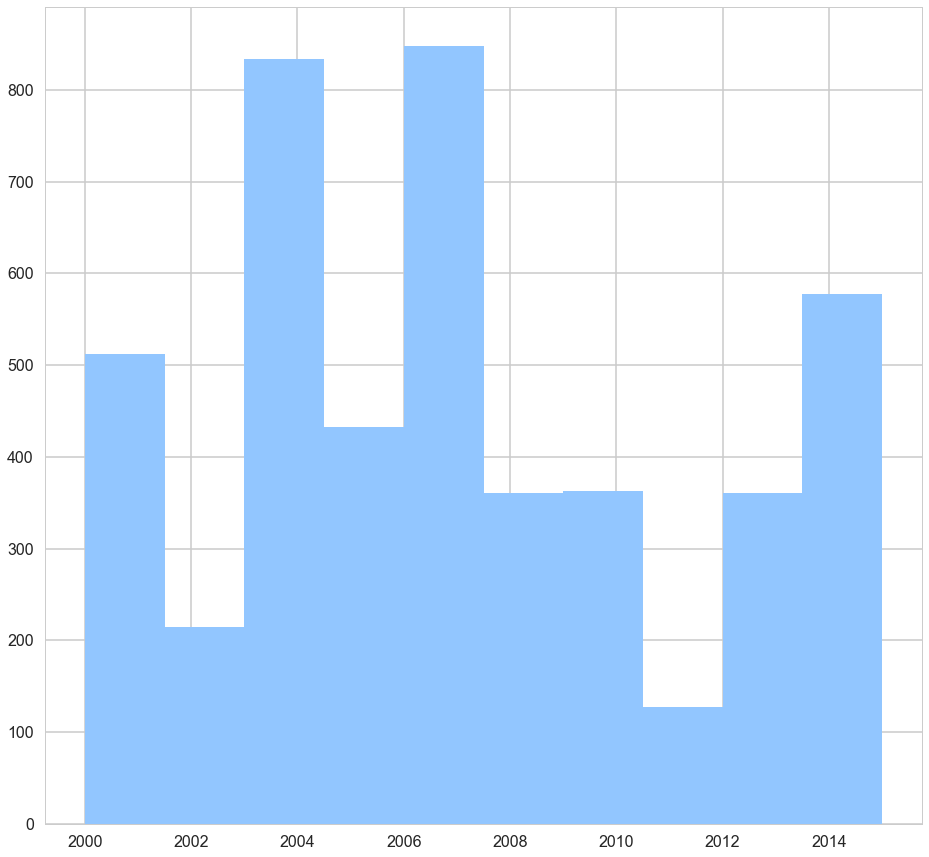

In [177]:
df_new_houses_index = df_new_houses.reset_index()
df_new_houses_index.yr_built.hist(figsize=[14,14]);

In [197]:
df_new_houses_index.head()

,index,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5,5/12/2014,1230000.0,4,4.5,5420,101930,1.0,0,0.0,...,11,3890,1530.0,2001,0,98053,47.6561,-122.005,4760,101930
1,9,3/12/2015,323000.0,3,2.5,1890,6560,2.0,0,0.0,...,7,1890,0.0,2003,0,98038,47.3684,-122.031,2390,7570
2,29,3/2/2015,719000.0,4,2.5,2570,7173,2.0,0,0.0,...,8,2570,0.0,2005,0,98052,47.7073,-122.110,2630,6026
3,30,11/10/2014,580500.0,3,2.5,2320,3980,2.0,0,0.0,...,8,2320,0.0,2003,0,98027,47.5391,-122.070,2580,3980
4,31,12/1/2014,280000.0,2,1.5,1190,1265,3.0,0,0.0,...,7,1190,0.0,2005,0,98133,47.7274,-122.357,1390,1756


In [209]:
(df_new_houses_index.zipcode == 98038).value_counts()

False    4339
True      291
Name: zipcode, dtype: int64

In [ ]:
plt.style.use('seaborn-white')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# Set an aspect ratio
width, height = plt.figaspect(1.68)
fig = plt.figure(figsize=(width,height), dpi=400)

# Product sales plot
ax1 = plt.subplot(221)
ax1.bar([1, 2, 3, 4], [125, 100, 90, 110], label="Year Built", width=0.8,
            align='center')
plt.xticks([1, 2, 3, 4], ['Q1', 'Q2', 'Q3', 'Q4'])
plt.xlabel('Year')
plt.ylabel('Number of Houses')
ax1.set_title("King County, WA New House Construction 2000-2015", fontstyle='italic')

# Opportunities by age plot
ax2 = plt.subplot(222)
bins = [0,10,20,30,40,50,60]
ax2.hist(df_year_built, bins, histtype='bar', rwidth=0.8)
plt.xlabel('Age (days)')
plt.ylabel('Closed sales')
ax2.set_title('Opportunities age', fontstyle='italic')

# Marketing channels line plot
ax3 = plt.subplot(2,2,(3,4))
y_series = [1,2,3,4,5]
x_1 = [5,9,9,12,9]
x_2 = [4,3,12,8,14]
x_3 = [1,3,4,2,5]
ax3.plot(y_series, x_1, linewidth=2, linestyle=':', marker='o', label='web')
ax3.plot(y_series, x_2, linewidth=2, linestyle='--', marker='v', label='telemarketing')
ax3.plot(y_series, x_3, linewidth=2, linestyle='-.', marker='s', label='sales team')
plt.xlabel('Months')
plt.ylabel('Marketing leads')
plt.xticks([1,2,3,4,5], ['Oct', 'Nov', 'Dec', 'Jan', 'Feb'])
#ax2.tick_params(axis='x', pad=8)
leg=plt.legend(loc='best', numpoints=1, fancybox=True)

# Axes alteration to put zero values inside the figure Axes
# Avoids axis white lines cutting through zero values - fivethirtyeight style
xmin, xmax, ymin, ymax = ax3.axis()
ax3.axis([xmin-0.1, xmax+0.1, ymin-0.1, ymax+0.4])
ax3.set_title('Leads by channel', fontstyle='italic')

# Space plots a bit
plt.subplots_adjust(hspace=0.25, wspace=0.40)

fig.suptitle("Seaborn-white style example")
plt.savefig('seaborn-style.svg', bbox_inches='tight')

In [249]:
df_new_houses.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,5/12/2014,1230000.0,4,4.5,5420,101930,1.0,0,0.0,3,11,3890,1530.0,2001,0,98053,47.6561,-122.005,4760,101930
9,3/12/2015,323000.0,3,2.5,1890,6560,2.0,0,0.0,3,7,1890,0.0,2003,0,98038,47.3684,-122.031,2390,7570
29,3/2/2015,719000.0,4,2.5,2570,7173,2.0,0,0.0,3,8,2570,0.0,2005,0,98052,47.7073,-122.110,2630,6026
30,11/10/2014,580500.0,3,2.5,2320,3980,2.0,0,0.0,3,8,2320,0.0,2003,0,98027,47.5391,-122.070,2580,3980
31,12/1/2014,280000.0,2,1.5,1190,1265,3.0,0,0.0,3,7,1190,0.0,2005,0,98133,47.7274,-122.357,1390,1756


In [251]:
df_new_houses.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,4.630000e+03,4630.000000,4630.000000,4630.000000,4.630000e+03,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000
mean,6.191115e+05,3.496112,2.679590,2473.316199,1.216871e+04,2.055076,0.003456,0.164363,3.007127,8.337365,2304.733693,168.582505,2006.835853,0.433909,98070.521166,47.556815,-122.169460,2233.591361,10300.390929
std,4.239580e+05,0.866484,0.634152,1046.320376,4.611941e+04,0.418815,0.058690,0.647364,0.089119,1.087154,951.420259,365.702376,4.249083,29.524968,44.723189,0.131086,0.155719,794.545714,33116.707996
min,1.607970e+05,1.000000,0.750000,550.000000,5.720000e+02,1.000000,0.000000,0.000000,3.000000,5.000000,550.000000,0.000000,2000.000000,0.000000,98001.000000,47.189500,-122.486000,690.000000,651.000000
25%,3.750000e+05,3.000000,2.500000,1640.000000,2.500000e+03,2.000000,0.000000,0.000000,3.000000,8.000000,1550.000000,0.000000,2004.000000,0.000000,98038.000000,47.484225,-122.309000,1580.000000,3043.250000
50%,5.030225e+05,3.500000,2.500000,2350.000000,5.000000e+03,2.000000,0.000000,0.000000,3.000000,8.000000,2240.000000,0.000000,2006.000000,0.000000,98059.000000,47.559550,-122.179000,2130.000000,5100.000000
75%,7.200000e+05,4.000000,3.000000,3080.000000,7.245000e+03,2.000000,0.000000,0.000000,3.000000,9.000000,2910.000000,148.750000,2010.000000,0.000000,98107.000000,47.671800,-122.034000,2730.000000,7253.750000
max,6.890000e+06,10.000000,7.750000,9890.000000,1.024068e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,3000.000000,2015.000000,2009.000000,98199.000000,47.776700,-121.402000,6210.000000,871200.000000


In [277]:
df_new_houses.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,4.630000e+03,4630.000000,4630.000000,4630.000000,4.630000e+03,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000
mean,6.191115e+05,3.496112,2.679590,2473.316199,1.216871e+04,2.055076,0.003456,0.164363,3.007127,8.337365,2304.733693,168.582505,2006.835853,0.433909,98070.521166,47.556815,-122.169460,2233.591361,10300.390929
std,4.239580e+05,0.866484,0.634152,1046.320376,4.611941e+04,0.418815,0.058690,0.647364,0.089119,1.087154,951.420259,365.702376,4.249083,29.524968,44.723189,0.131086,0.155719,794.545714,33116.707996
min,1.607970e+05,1.000000,0.750000,550.000000,5.720000e+02,1.000000,0.000000,0.000000,3.000000,5.000000,550.000000,0.000000,2000.000000,0.000000,98001.000000,47.189500,-122.486000,690.000000,651.000000
25%,3.750000e+05,3.000000,2.500000,1640.000000,2.500000e+03,2.000000,0.000000,0.000000,3.000000,8.000000,1550.000000,0.000000,2004.000000,0.000000,98038.000000,47.484225,-122.309000,1580.000000,3043.250000
50%,5.030225e+05,3.500000,2.500000,2350.000000,5.000000e+03,2.000000,0.000000,0.000000,3.000000,8.000000,2240.000000,0.000000,2006.000000,0.000000,98059.000000,47.559550,-122.179000,2130.000000,5100.000000
75%,7.200000e+05,4.000000,3.000000,3080.000000,7.245000e+03,2.000000,0.000000,0.000000,3.000000,9.000000,2910.000000,148.750000,2010.000000,0.000000,98107.000000,47.671800,-122.034000,2730.000000,7253.750000
max,6.890000e+06,10.000000,7.750000,9890.000000,1.024068e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,3000.000000,2015.000000,2009.000000,98199.000000,47.776700,-121.402000,6210.000000,871200.000000


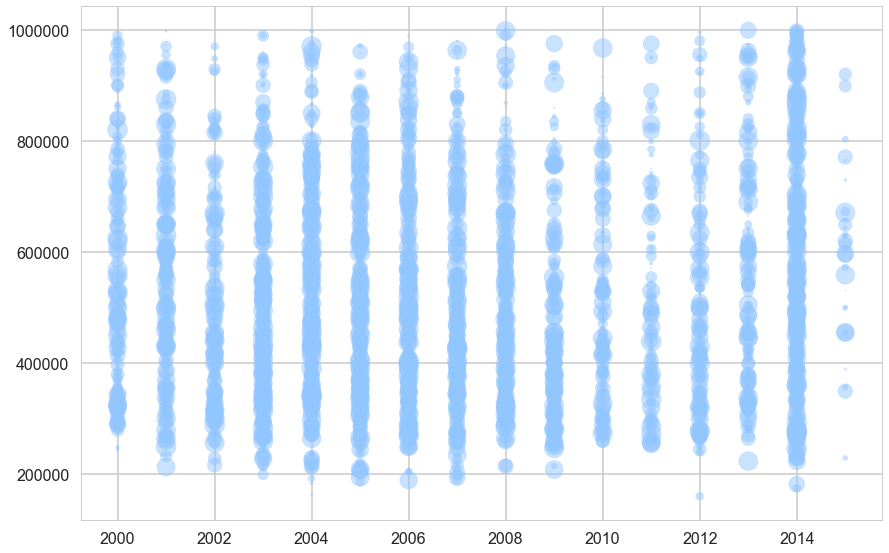

In [293]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)


N = len(df_new_houses_outlier_1)
x = df_new_houses_outlier_1.yr_built
y = df_new_houses_outlier_1.price
area = (20 * np.random.rand(N))**2

plt.scatter(x, y, s=area, alpha=0.5)
plt.show()

In [287]:
(df_new_houses.price < 1000000).value_counts()

True     4170
False     460
Name: price, dtype: int64

In [292]:
df_new_houses_outlier_1 = df_new_houses.loc[df['price'] < 1000000]

In [329]:
df_mid_age_houses = df[(df.yr_built < 1980) & (df.yr_built > 1960)]

In [330]:
df_mid_age_houses = df_mid_age_houses.loc[df_mid_age_houses['price'] < 1000000]

In [331]:
len(df_mid_age_houses)

4396

In [332]:
df_mid_age_houses.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000
mean,429825.145587,3.542766,1.971394,1969.211328,16442.748180,1.147975,0.002275,0.152866,3.621929,7.418562,1552.651274,416.560055,1970.402184,37.803458,98057.174022,47.539940,-122.192857,1911.208826,14649.630801
std,185770.189806,0.827150,0.596795,658.458859,32401.767086,0.343969,0.047646,0.595255,0.665354,0.739868,514.846477,473.917256,5.877609,272.543962,51.009919,0.155652,0.120036,497.163947,24649.549354
min,89000.000000,1.000000,0.750000,380.000000,779.000000,1.000000,0.000000,0.000000,1.000000,4.000000,380.000000,0.000000,1961.000000,0.000000,98001.000000,47.155900,-122.514000,820.000000,794.000000
25%,282875.000000,3.000000,1.750000,1490.000000,7689.750000,1.000000,0.000000,0.000000,3.000000,7.000000,1210.000000,0.000000,1966.000000,0.000000,98023.000000,47.398400,-122.285000,1550.000000,7725.000000
50%,397000.000000,3.000000,2.000000,1900.000000,9525.000000,1.000000,0.000000,0.000000,4.000000,7.000000,1430.000000,300.000000,1969.000000,0.000000,98042.000000,47.547850,-122.185000,1870.000000,9191.000000
75%,535000.000000,4.000000,2.500000,2340.000000,12331.250000,1.000000,0.000000,0.000000,4.000000,8.000000,1760.000000,770.000000,1976.000000,0.000000,98072.000000,47.688725,-122.124000,2210.000000,11337.750000
max,999950.000000,8.000000,5.250000,5470.000000,715690.000000,3.000000,1.000000,4.000000,5.000000,11.000000,5370.000000,2720.000000,1979.000000,2015.000000,98199.000000,47.777600,-121.321000,4100.000000,422967.000000


In [324]:
df_older_houses = df[(df.yr_built < 1950) & (df.yr_built > 1900)]

In [348]:
df_older_houses_outlier_1 = df_older_houses.loc[df_older_houses['price'] < 1000000]

In [349]:
len(df_older_houses_outlier_1)

4379

In [327]:
len(df_new_houses_outlier_1)

4170

In [328]:
df_older_houses_outlier_1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,4379.000000,4379.000000,4379.000000,4379.000000,4.379000e+03,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000,4379.000000
mean,470754.796986,2.972596,1.535339,1557.258278,1.022178e+04,1.271066,0.005481,0.209865,3.629824,6.787394,1271.507193,285.751085,1929.564056,168.358529,98116.042704,47.599548,-122.309288,1578.561315,8442.736241
std,200638.894232,1.106143,0.635544,618.114163,4.186945e+04,0.361695,0.073837,0.703079,0.781955,0.832619,458.552002,379.695941,14.284222,554.268060,40.179295,0.106490,0.098703,418.924603,20471.632326
min,78000.000000,1.000000,0.500000,370.000000,8.330000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1901.000000,0.000000,98001.000000,47.177600,-122.512000,460.000000,660.000000
25%,310000.000000,2.000000,1.000000,1070.000000,4.223500e+03,1.000000,0.000000,0.000000,3.000000,6.000000,930.000000,0.000000,1918.000000,0.000000,98106.000000,47.530450,-122.366000,1290.000000,4300.000000
50%,449000.000000,3.000000,1.500000,1460.000000,5.544000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1929.000000,0.000000,98117.000000,47.628200,-122.325000,1520.000000,5500.000000
75%,604500.000000,4.000000,2.000000,1940.000000,7.680000e+03,1.500000,0.000000,0.000000,4.000000,7.000000,1540.000000,590.000000,1943.000000,0.000000,98133.000000,47.682450,-122.289000,1800.000000,7503.500000
max,999000.000000,33.000000,5.750000,4750.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,10.000000,4750.000000,1910.000000,1949.000000,2015.000000,98199.000000,47.776200,-121.325000,4950.000000,425581.000000


In [306]:
df_new_houses_outlier_1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,4170.000000,4170.000000,4170.000000,4170.000000,4.170000e+03,4170.000000,4170.0,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000
mean,513368.389209,3.416787,2.575180,2279.450839,1.037883e+04,2.060552,0.0,0.091127,3.006715,8.130216,2157.037890,122.412950,2006.841247,0.481775,98071.746523,47.550362,-122.167882,2145.755156,9070.901439
std,186373.790288,0.833979,0.516386,830.193421,4.074339e+04,0.424417,0.0,0.463949,0.087353,0.883783,808.277656,280.853203,4.220673,31.110852,44.219798,0.135024,0.158208,709.700260,29222.813743
min,160797.000000,1.000000,0.750000,550.000000,5.720000e+02,1.000000,0.0,0.000000,3.000000,5.000000,550.000000,0.000000,2000.000000,0.000000,98001.000000,47.189500,-122.486000,690.000000,651.000000
25%,362566.000000,3.000000,2.500000,1581.000000,2.037000e+03,2.000000,0.0,0.000000,3.000000,8.000000,1480.000000,0.000000,2004.000000,0.000000,98038.000000,47.471400,-122.311000,1550.000000,2699.250000
50%,475000.000000,3.000000,2.500000,2205.500000,4.780000e+03,2.000000,0.0,0.000000,3.000000,8.000000,2110.000000,0.000000,2006.000000,0.000000,98059.000000,47.550600,-122.172000,2060.000000,4957.000000
75%,640750.000000,4.000000,2.750000,2860.000000,6.650750e+03,2.000000,0.0,0.000000,3.000000,9.000000,2760.000000,0.000000,2010.000000,0.000000,98107.000000,47.672200,-122.032000,2640.000000,6630.000000
max,999999.000000,7.000000,6.000000,7120.000000,1.024068e+06,3.500000,0.0,4.000000,5.000000,12.000000,5710.000000,2150.000000,2015.000000,2009.000000,98199.000000,47.776700,-121.402000,4670.000000,871200.000000


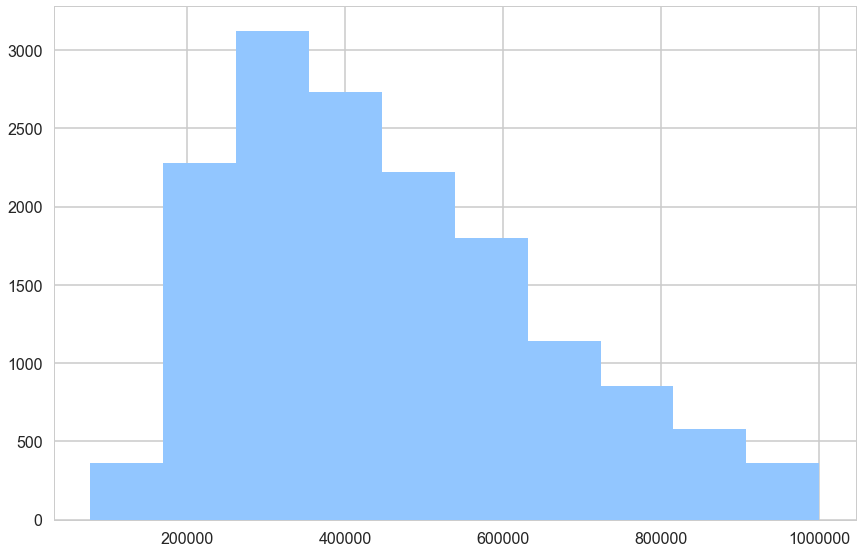

In [302]:
df_older_houses_outlier_1.price.hist()

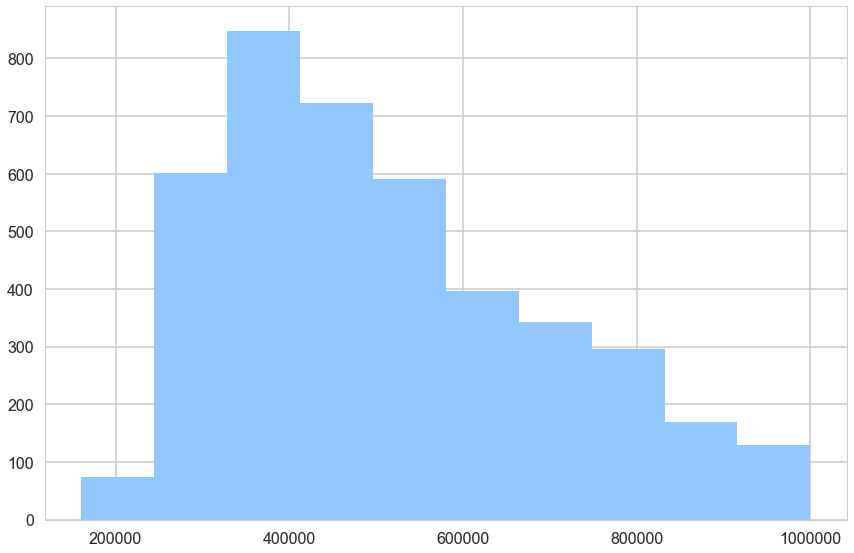

In [303]:
df_new_houses_outlier_1.price.hist()

In [307]:
df_new_houses.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,4.630000e+03,4630.000000,4630.000000,4630.000000,4.630000e+03,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000
mean,6.191115e+05,3.496112,2.679590,2473.316199,1.216871e+04,2.055076,0.003456,0.164363,3.007127,8.337365,2304.733693,168.582505,2006.835853,0.433909,98070.521166,47.556815,-122.169460,2233.591361,10300.390929
std,4.239580e+05,0.866484,0.634152,1046.320376,4.611941e+04,0.418815,0.058690,0.647364,0.089119,1.087154,951.420259,365.702376,4.249083,29.524968,44.723189,0.131086,0.155719,794.545714,33116.707996
min,1.607970e+05,1.000000,0.750000,550.000000,5.720000e+02,1.000000,0.000000,0.000000,3.000000,5.000000,550.000000,0.000000,2000.000000,0.000000,98001.000000,47.189500,-122.486000,690.000000,651.000000
25%,3.750000e+05,3.000000,2.500000,1640.000000,2.500000e+03,2.000000,0.000000,0.000000,3.000000,8.000000,1550.000000,0.000000,2004.000000,0.000000,98038.000000,47.484225,-122.309000,1580.000000,3043.250000
50%,5.030225e+05,3.500000,2.500000,2350.000000,5.000000e+03,2.000000,0.000000,0.000000,3.000000,8.000000,2240.000000,0.000000,2006.000000,0.000000,98059.000000,47.559550,-122.179000,2130.000000,5100.000000
75%,7.200000e+05,4.000000,3.000000,3080.000000,7.245000e+03,2.000000,0.000000,0.000000,3.000000,9.000000,2910.000000,148.750000,2010.000000,0.000000,98107.000000,47.671800,-122.034000,2730.000000,7253.750000
max,6.890000e+06,10.000000,7.750000,9890.000000,1.024068e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,3000.000000,2015.000000,2009.000000,98199.000000,47.776700,-121.402000,6210.000000,871200.000000


In [308]:
df_older_houses.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.645200e+04,16452.000000,16452.000000,16452.000000,1.645200e+04,16452.000000,16452.000000,16452.000000,16452.000000,16452.000000,16452.000000,16452.000000,16452.000000,16452.000000,16452.000000,16452.000000,16452.000000,16452.000000,16452.000000
mean,5.180524e+05,3.337588,1.957285,1969.772368,1.589622e+04,1.335613,0.007598,0.252735,3.523158,7.466448,1643.859774,325.912594,1960.944809,87.475261,98079.923839,47.561371,-122.226333,1917.497265,13416.973803
std,3.457251e+05,0.937894,0.726884,846.063078,3.963346e+04,0.457989,0.086837,0.793993,0.694034,1.125208,727.109686,455.289584,25.183711,408.622765,55.583511,0.140590,0.133420,634.554244,25174.715915
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,660.000000
25%,3.050000e+05,3.000000,1.500000,1370.000000,6.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1140.000000,0.000000,1947.000000,0.000000,98032.000000,47.466475,-122.332000,1467.500000,6000.000000
50%,4.375000e+05,3.000000,2.000000,1830.000000,8.239000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1450.000000,0.000000,1964.000000,0.000000,98072.000000,47.574900,-122.256000,1790.000000,8100.000000
75%,6.200000e+05,4.000000,2.500000,2390.000000,1.160025e+04,2.000000,0.000000,0.000000,4.000000,8.000000,1960.000000,640.000000,1981.000000,0.000000,98118.000000,47.680100,-122.147000,2250.000000,10631.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,1999.000000,2015.000000,98199.000000,47.777600,-121.315000,5600.000000,560617.000000


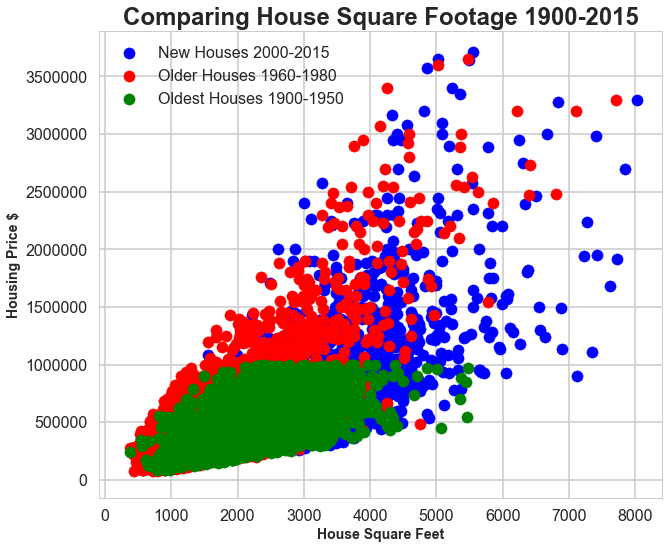

In [385]:
fig = plt.figure(figsize=(9,8))
fig.suptitle('', fontsize=16)
plt.scatter(df_new_houses_outlier_3.sqft_living, df_new_houses_outlier_3.price, c='blue', label='New Houses 2000-2015')
plt.scatter(df_older_houses_outlier_3.sqft_living, df_older_houses_outlier_3.price, c='red', label='Older Houses 1960-1980')
plt.scatter(df_mid_age_houses_outlier_1.sqft_living, df_mid_age_houses_outlier_1.price, c='green', label='Oldest Houses 1900-1950')
plt.title('Comparing House Square Footage 1900-2015', fontsize=24, fontweight='bold')
plt.legend(loc='upper left')
plt.xlabel("House Square Feet", fontsize=14, fontweight='bold')
plt.ylabel("Housing Price $", fontsize=14, fontweight='bold')
plt.show();

In [359]:
df_older_houses_outlier_2 = df_older_houses.loc[df_older_houses['sqft_lot'] < 300000]
len(df_older_houses_outlier_2)

4697

In [369]:
df_new_houses_outlier_3 = df_new_houses.loc[(df['price'] < 4000000) & (df['sqft_lot'] < 300000)]

In [373]:
df_older_houses_outlier_3 = df_older_houses.loc[(df['price'] < 4000000) & (df['sqft_lot'] < 300000)]

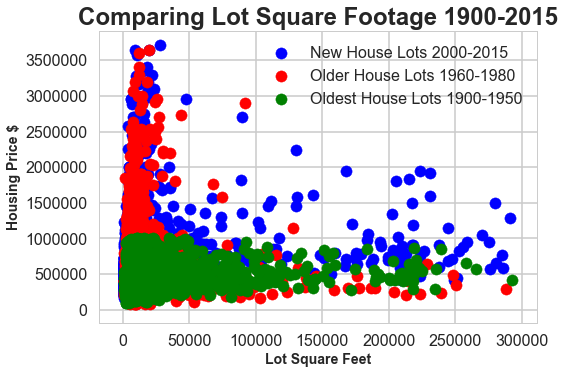

In [381]:
fig = plt.figure(figsize=(7,5))
fig.suptitle('', fontsize=16)
plt.scatter(df_new_houses_outlier_3.sqft_lot, df_new_houses_outlier_3.price, c='blue', label='New House Lots 2000-2015')
plt.scatter(df_older_houses_outlier_3.sqft_lot, df_older_houses_outlier_3.price, c='red', label='Older House Lots 1960-1980')
plt.scatter(df_mid_age_houses_outlier_1.sqft_lot, df_mid_age_houses_outlier_1.price, c='green', label='Oldest House Lots 1900-1950')
plt.xlabel("Lot Square Feet", fontsize=14, fontweight='bold')
plt.ylabel("Housing Price $", fontsize=14, fontweight='bold')
plt.title('Comparing Lot Square Footage 1900-2015', fontsize=24, fontweight='bold')
plt.legend(loc='upper right')
plt.show();

In [357]:
df_mid_age_houses_outlier_1 = df_mid_age_houses.loc[df_mid_age_houses['sqft_lot'] < 300000]